# Cyclistic Bike-Share Analysis

## **<font color = black> Goal </font>**
Design marketing strategies aimed at converting casual riders into annual members.

#### Casual riders
Riders who purchased a 24-Hour Pass

#### Members riders
Riders who purchased an Annual Membership

### <font color = black > Stakeholders </font>
The project stakeholder is **Lily Moreno**,the director of marketing and the manager of Cyclistic, a bike-share company in Chicago. He set the above goal and has a broader vision of the business. The analyst team has to communicate efficiently and frequently with Lily in all steps of the analysis process in order to achieve the goal. 

The analyst team will first hold a meeting with **Lily Moreno** to ask specific questions about the goal, this will help the team better understand the goal and break down the later into smaller tasks, that will serve as a guide for the analysts team during the process.

### **<font color = black > I) Ask </font>**
To guide the Analyst team answer the goal, we break it down into the following:
- How do annual members and casual riders use Cyclistic bikes differently?
- Why would casual riders buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual riders to become members?




### **<font color = black> II) Prepare </font>**

The public data is generated by Motivate International Inc under a license, this makes the data source reliable and original.
Google Data Analytic provided us with the data through a link. Collected (downloaded) from [Download the previous 12 months of Cyclistic trip data here](https://divvy-tripdata.s3.amazonaws.com/index.html). 

- We donot have private columns, the entire data can be viewed by the whole team, no need to hide or give some special access to anyone.
- We limit our analysis to historical data on the latest year that has data for 12 months. 
- The data dowloaded is stored in a CSV Microsoft EXCEL file.
- It is stored in a tabular form. Each row represents a casual rider or annual member ride information.
- The file contains information on each ride's id, customers' type (casual or member), the start and end datetime of each trip, the start and end station names.
- We do have some columns with some missing values, in the process step we will see how to tackle the issue.

### **<font color = black> III) Process </font>**
> We will use the pandas library of python for data cleaning and data shaping.
> While doing the latter, we have to comment each section to describe the thought process behind.
> Hold several points with the stakeholder (**Moreno**) during the completion of this part.

In [2]:
import pandas as pd
import numpy as np

####  **1) Import the data to python**

We have 12 CSV Microsoft EXCEL files downloaded and of the same structure (names and number of columns), stored in our workspace. We have to import each of these files and concatenate them to form a unique table (**shaping the data**).

In [3]:
data_01= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202201-divvy-tripdata\202201-divvy-tripdata.csv")
data_02= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202202-divvy-tripdata\202202-divvy-tripdata.csv")
data_03= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202203-divvy-tripdata\202203-divvy-tripdata.csv")
data_04= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202204-divvy-tripdata\202204-divvy-tripdata.csv")
data_05= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202205-divvy-tripdata\202205-divvy-tripdata.csv")
data_06= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202206-divvy-tripdata\202206-divvy-tripdata.csv")
data_07= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202207-divvy-tripdata\202207-divvy-tripdata.csv")
data_08= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202208-divvy-tripdata\202208-divvy-tripdata.csv")
data_09= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202209-divvy-tripdata\202209-divvy-publictripdata.csv")
data_10= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202210-divvy-tripdata\202210-divvy-tripdata.csv")
data_11= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202211-divvy-tripdata\202211-divvy-tripdata.csv")
data_12= pd.read_csv(r"C:\Users\pc\Documents\Projet\Projet Python\Bike Share program\DATA\202212-divvy-tripdata\202212-divvy-tripdata.csv")


In [4]:
data_01.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.0128,-87.665906,42.01256,-87.674367,casual


In [5]:
data_12.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member


- The results of theses queries: data_01 and data_12, give thesame number of columns, thesame type and the same name. 
- We can confidently concatenate these dataframe objects

#### **2) Concatenate the dataframes**

In [6]:
frames = [data_01,data_02,data_03,data_04,data_05,data_06,data_07,data_08,data_09,data_10,data_11,data_12]
data_2022 = pd.concat(frames)

In [7]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


- We have a total of 13 columns and 5 667 717 records

#### **3) Check for null values**

In [8]:
data_2022.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

- The following qualitative columns have null values : start_station_name,start_station_id,end_station_name,end_station_id,end_lat,end_lng.
- When doing statistics on these columns, we should not forget to take into account that, they do have some missing values. This will help the Executive know the limits and the cons in our analysis during the  **Share** and **Act** steps.
    * *This company is a fictitious one, so impossible for us to search for the missing values on the internet, more to that we have so many null records*.
- We have all values in the started_at, ended_at, member_casual and ride_id. This is good because it helps us examine each ride.

#### **4) Data types of each column**

In [9]:
data_2022.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

- ride_id, start_station_name, start_station_id, end_station_name, end_station_id, member_casual and rideable_type are of type "object", so a string, it is what we expect.
- started_at and ended_at are of type "object". I was expecting a datetime type, because the columns are made up of a date and a time.
- start_lat, start_lng, end_lat and end_lng are of type float64, it matches up our expectation.
- *How do we tackle the started_at and ended_at columns?*

####  **Change the columns "started_at" and "ended_at" to the type "datetime"**
- Make a copy of the the dataframe data_2022.
- Create a copy of the concerned columns and change their type to datetime

In [10]:
data_2022_v001= data_2022.copy()

In [11]:
data_2022_v001.insert(3,'started_at_modif',pd.to_datetime(data_2022_v001["started_at"]))


In [12]:
data_2022_v001.insert(5,'ended_at_modif',pd.to_datetime(data_2022_v001["ended_at"]))


In [13]:
data_2022_v001.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
started_at_modif      datetime64[ns]
ended_at                      object
ended_at_modif        datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

- We have a copy of the columns in the expected data type.

#### **5) Check for misspellings**
- For the qualitative columns "rideable_type" and "member_casual" we check for typo errors 
- Example:
    * casual, casualll, caslaul
    * Electric bike, electrik_bike
    * Blank spaces

In [14]:
data_2022_v001.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
started_at_modif           0
ended_at                   0
ended_at_modif             0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [15]:
data_2022_v001["rideable_type"].value_counts()

electric_bike    2889029
classic_bike     2601214
docked_bike       177474
Name: rideable_type, dtype: int64

In [16]:
data_2022_v001["member_casual"].value_counts()

member    3345685
casual    2322032
Name: member_casual, dtype: int64

- We donot have cells with blank characters
- No misspellings

#### **6) Check for duplicates**
- Each ride is unique, we hope to have unique records (rows)
- The dataset, has the ride_id column which describes each ride taken by a casual or an annual member
- The dataset doesnot identify each customer, it tells weather the ride was taken by a casual or an annual member

In [17]:
data_2022_v001[data_2022_v001.duplicated(subset=["ride_id"], keep="first")]

,ride_id,rideable_type,started_at,started_at_modif,ended_at,ended_at_modif,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


- No record returned, we do not have duplicates for the column "ride_id". This confirms that each record of the dataframe is unique.

#### **7) Add a weekday and month column derived from the columns "started_at" and "ended_at"**
> We do this to have the data in shape for the **Analyse** step of the data analysis process (DAP).
> The day of the week with Monday=0, Sunday=6.


In [18]:
data_2022_v001.head(1)

,ride_id,rideable_type,started_at,started_at_modif,ended_at,ended_at_modif,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 11:59:47,2022-01-13 12:02:44,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.0128,-87.665906,42.01256,-87.674367,casual


In [19]:
data_2022_v001.insert(4,'month_started_at_modif',data_2022_v001['started_at_modif'].dt.month)
data_2022_v001.insert(7,'month_ended_at_modif',data_2022_v001['ended_at_modif'].dt.month)


In [20]:
data_2022_v001.tail(1)

,ride_id,rideable_type,started_at,started_at_modif,month_started_at_modif,ended_at,ended_at_modif,month_ended_at_modif,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
181805,2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:27:25,12,2022-12-09 00:35:28,2022-12-09 00:35:28,12,Southport Ave & Waveland Ave,13235,Seeley Ave & Roscoe St,13144,41.94815,-87.66394,41.943403,-87.679618,casual


In [21]:
data_2022_v001.insert(5,'dayofweek_started_at_modif',data_2022_v001['started_at_modif'].dt.dayofweek)
data_2022_v001.insert(9,'dayofweek_ended_at_modif',data_2022_v001['ended_at_modif'].dt.dayofweek)


In [22]:
data_2022_v001.head(1)

,ride_id,rideable_type,started_at,started_at_modif,month_started_at_modif,dayofweek_started_at_modif,ended_at,ended_at_modif,month_ended_at_modif,dayofweek_ended_at_modif,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 11:59:47,1,3,2022-01-13 12:02:44,2022-01-13 12:02:44,1,3,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.0128,-87.665906,42.01256,-87.674367,casual


- The "month" columns and "weekday" columns have been successfully added to the dataframe.

#### **8) Shape the dataframe to have the ride time**
A ride time start can't be greater than a ride time end, nor equal. Let us verify the latter

In [23]:
data_2022_v001.loc[(data_2022_v001["started_at_modif"])>=(data_2022_v001["ended_at_modif"])].shape

(531, 19)

- We have 531 records, 19 columns that confirms the above.
- It means that the date time they started the ride is > date time ended the ride, this can't be possible.
- It might be an error during "Data collection".

In [24]:
# Subset of the dataframe that exludes "started_at_modif >= "endend_at_modif"
data_2022_v002 = data_2022_v001.loc[(data_2022_v001["started_at_modif"])<(data_2022_v001["ended_at_modif"])]

In [25]:
# Calculate ride time
data_2022_v002.insert(10,'ride time',data_2022_v002["ended_at_modif"] - data_2022_v002["started_at_modif"])


In [26]:
data_2022_v002.head(1)

,ride_id,rideable_type,started_at,started_at_modif,month_started_at_modif,dayofweek_started_at_modif,ended_at,ended_at_modif,month_ended_at_modif,dayofweek_ended_at_modif,ride time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 11:59:47,1,3,2022-01-13 12:02:44,2022-01-13 12:02:44,1,3,0 days 00:02:57,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.0128,-87.665906,42.01256,-87.674367,casual


- Ride time unit is in days HH:MM:SS
- Let us convert this time format to min, this will ease analysis on the "ride time" colum

#### **9) Convert ride time's unit " days HH: MM: SS" to "min"**

In [ ]:
data_2022_v002[["ride_time_01","ride_time_02", "ride_time_03"]]= data_2022_v002["ride time"].astype(str).str.split(" ",expand=True,)


In [29]:
data_2022_v002.insert(23, "ride_time_01_min",data_2022_v002["ride_time_01"].apply(lambda x : int(x)*1440))

In [30]:
data_2022_v002.insert(24, "ride_time_03_min",data_2022_v002["ride_time_03"].str.split(":").apply(lambda x : int(x[0])*60 + int(x[1]) + int(x[2])*(1/60.0)))

In [31]:
data_2022_v002.insert(25, "ride_time_min",data_2022_v002["ride_time_01_min"] + data_2022_v002["ride_time_03_min"])

### **<font color = black> IV) Analyse </font>**
> The previous steps will help us conduct a proficient analysis to answer the questions in the **Ask** step, indirectly answering the goal. 
> In this step of the data analysis process, we do calculations, data shaping to sketch visuals for the **Share** step.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

####  **1) Number of  yearly rides for each type of member, and their respective percentages**

In [33]:
t_1 = data_2022_v001.groupby("member_casual").count().loc[:,["ride_id"]].reset_index()
t_1.rename(columns={"ride_id": "total"}, inplace = True)

In [34]:
t_1

,member_casual,total
0,casual,2322032
1,member,3345685


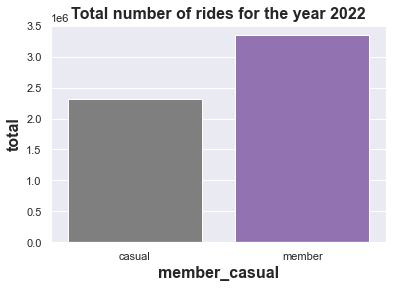

In [35]:
sns.set()
sns.barplot(data=t_1, x="member_casual", y="total", color = 'purple', palette = ['tab:grey', 'tab:purple']).set(title = "Total number of ride for the year 2022")
plt.xlabel('member_casual', fontsize=16, fontweight = "bold");
plt.ylabel('total', fontsize=16,fontweight = "bold");
plt.title ("Total number of rides for the year 2022",fontsize=16,fontweight = "bold")
plt.show()

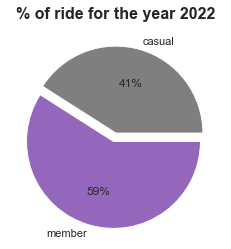

In [36]:
sns.set()
explode = [0, 0.1]
palette_color= ['tab:grey', 'tab:purple']
plt.pie(t_1["total"], labels=t_1["member_casual"], colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title ("% of rides for the year 2022",fontsize=16,fontweight = "bold")
plt.show()

#### **2) Total rides taken per month for each type of customers**
- We previously saw the total number of rides in a year, a higher aggregated level, let us look at it at a more granular level like month to see the trend in rides

In [37]:
t_2 = data_2022_v001.groupby(["month_started_at_modif","member_casual"]).count().loc[:,["ride_id"]].reset_index()
t_2.rename(columns={"ride_id": "total"}, inplace = True)
t_2.replace({'month_started_at_modif': {1: "Jan", 2: "Feb",3: "Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}}, inplace=True)

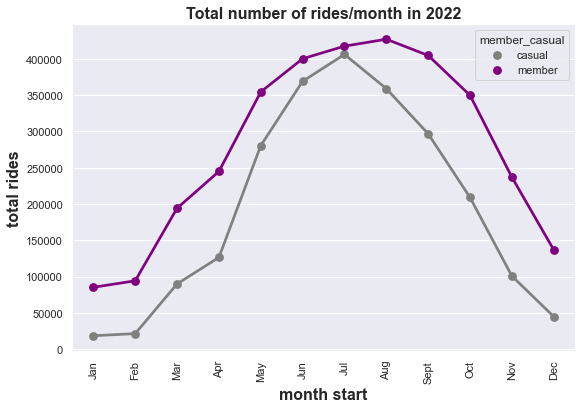

In [39]:
sns.set()
plt.figure(figsize=(9,6))
sns.pointplot(x='month_started_at_modif', y='total', data = t_2, hue='member_casual', palette=["grey","purple"])
plt.xlabel('month start', fontsize=16, fontweight = "bold");
plt.ylabel('total rides', fontsize=16,fontweight = "bold");
plt.title ("Total number of rides/month in 2022",fontsize=16,fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()

#### **The average difference of rides between member_casual per month**

In [43]:
# Shape the datafram t_2, to answer the question
t_2_0=t_2.pivot_table(index=['month_started_at_modif'],columns=['member_casual'], values="total",aggfunc='sum').reset_index()

In [46]:
t_2_0.insert(3, "ride_difference",t_2_0["member"]-t_2_0["casual"])

In [48]:
t_2_0["ride_difference"].mean()

85304.41666666667

#### **3) The total rides for each day in a week**

In [52]:
data_2022_v001.head(2)

,ride_id,rideable_type,started_at,started_at_modif,month_started_at_modif,dayofweek_started_at_modif,ended_at,ended_at_modif,month_ended_at_modif,dayofweek_ended_at_modif,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 11:59:47,1,3,2022-01-13 12:02:44,2022-01-13 12:02:44,1,3,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:41:56,1,0,2022-01-10 08:46:17,2022-01-10 08:46:17,1,0,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual


In [53]:
t_3=data_2022_v001.pivot_table(index=['dayofweek_started_at_modif'],columns=['member_casual'], values="ride_id",aggfunc='count').reset_index()
t_3.replace({'dayofweek_started_at_modif': {0: "Mon", 1: "Tues",2: "Wed",3:"Thur",4:"Fri",5:"Sat",6:"Sun"}}, inplace=True)
t_3.set_index("dayofweek_started_at_modif", inplace=True)

#### **Total rides in percentage**

In [54]:
t_3["total_ride"]= t_3.sum(axis=1)
t_3["% casual"]= (t_3["casual"]/t_3["total_ride"])*100
t_3["% member"]= (t_3["member"]/t_3["total_ride"])*100

In [55]:
t_3

member_casual,casual,member,total_ride,% casual,% member
dayofweek_started_at_modif,,,,,
Mon,277675,473339,751014,36.973345,63.026655
Tues,263746,518626,782372,33.711074,66.288926
Wed,274354,523869,798223,34.370596,65.629404
Thur,309330,532261,841591,36.755384,63.244616
Fri,334701,467086,801787,41.744378,58.255622
Sat,473190,443281,916471,51.631748,48.368252
Sun,389036,387223,776259,50.116778,49.883222


<Figure size 1440x432 with 0 Axes>

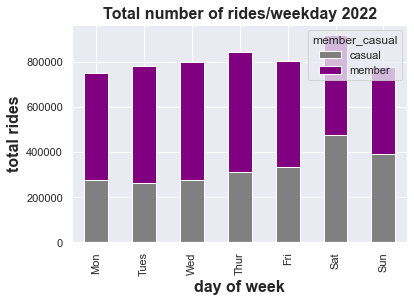

In [56]:
t_3=t_3[["casual","member"]]
sns.set()
plt.figure(figsize=(20,6))
t_3.plot(kind='bar', stacked=True, color=['grey', 'purple'])
plt.xlabel('day of week', fontsize=16, fontweight = "bold")
plt.ylabel('total rides', fontsize=16, fontweight = "bold")
plt.title ("Total number of rides/weekday 2022",fontsize=16,fontweight = "bold")
plt.show()

#### **4) Types of bikes per type of customers**

In [75]:
# We will start by having the proprtion of rides for each bike type
t_4_0 = data_2022_v001.groupby("rideable_type").count().loc[:,["ride_id"]].reset_index().sort_values(["ride_id"], axis=0, na_position ="last", ascending=False)

In [76]:
t_4_0

,rideable_type,ride_id
2,electric_bike,2889029
0,classic_bike,2601214
1,docked_bike,177474


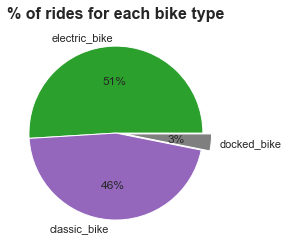

In [79]:
sns.set()
explode = [0, 0, 0.1]
palette_color= ['tab:green', 'tab:purple','tab:grey']
plt.pie(t_4_0["ride_id"], labels=t_4_0["rideable_type"], colors=palette_color,explode=explode, autopct='%.0f%%')
plt.title ("% of rides for each bike type",fontsize=16,fontweight = "bold")
plt.show()

In [57]:
t_4=data_2022_v001.pivot_table(index=['rideable_type'],columns=['member_casual'], values="ride_id",aggfunc='count')

#### **Types of bikes/customers in percentage**

In [58]:
t_4["total_ride_bike"]= t_4.sum(axis=1)

In [59]:
t_4["% casual"]= (t_4["casual"]/t_4["total_ride_bike"])*100
t_4["% member"]= (t_4["member"]/t_4["total_ride_bike"])*100

In [60]:
t_4

member_casual,casual,member,total_ride_bike,% casual,% member
rideable_type,,,,,
classic_bike,891459.0,1709755.0,2601214.0,34.270883,65.729117
docked_bike,177474.0,NaN,177474.0,100.000000,NaN
electric_bike,1253099.0,1635930.0,2889029.0,43.374400,56.625600


<Figure size 1440x432 with 0 Axes>

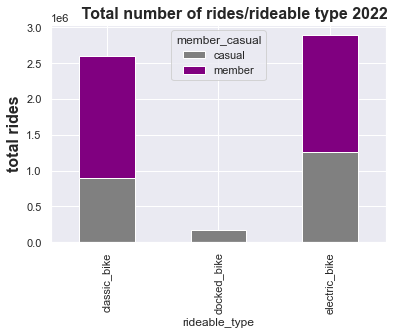

In [61]:
t_4=t_4[["casual","member"]]
sns.set()
plt.figure(figsize=(20,6))
t_4.plot(kind='bar', stacked=True, color=['grey', 'purple'])
plt.ylabel('total rides', fontsize=16, fontweight = "bold")
plt.title ("       Total number of rides/rideable type 2022",fontsize=16,fontweight = "bold")
plt.show()

#### **5) Contour of the data in the "ride_time_min" column**
- Min, Max, Average ..of ride time for casual & annual members for each rideable type.
- We will divide the ride_time_min into subgroups based on the rideable type, before doing descriptive satitistics

In [90]:
from scipy.special import ndtri

In [80]:
# The column of interest is "ride_time_min"
data_2022_v002.head(1)

,ride_id,rideable_type,started_at,started_at_modif,month_started_at_modif,dayofweek_started_at_modif,ended_at,ended_at_modif,month_ended_at_modif,dayofweek_ended_at_modif,...,start_lng,end_lat,end_lng,member_casual,ride_time_01,ride_time_02,ride_time_03,ride_time_01_min,ride_time_03_min,ride_time_min
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 11:59:47,1,3,2022-01-13 12:02:44,2022-01-13 12:02:44,1,3,...,-87.665906,42.01256,-87.674367,casual,0,days,00:02:57,0,2.95,2.95


#### **Ride time with docked bikes**

In [81]:
data_2022_v002.loc[data_2022_v002["rideable_type"]=="docked_bike"].groupby("member_casual").describe().loc[:,["ride_time_min"]]

ride_time_min                                                   \
                      count        mean        std       min      25%    50%   
member_casual                                                                  
casual             177468.0  122.715698  958.49423  0.016667  16.1125  28.05   

                                    
                     75%       max  
member_casual                       
casual         55.233333  41387.25

In [93]:
data_docked = data_2022_v002.loc[data_2022_v002["rideable_type"]=="docked_bike"].sort_values(by="ride_time_min",ascending=True).reset_index()

In [94]:
data_docked["count"]=data_docked.index + 1
rows= data_docked["count"].shape[0]
data_docked["percentile"]=data_docked["count"]/rows

In [95]:
data_docked["z_theory"]=ndtri(data_docked["percentile"])
data_docked["z_actual"]=(data_docked["ride_time_min"]-data_docked["ride_time_min"].mean())/data_docked["ride_time_min"].std(ddof=0)

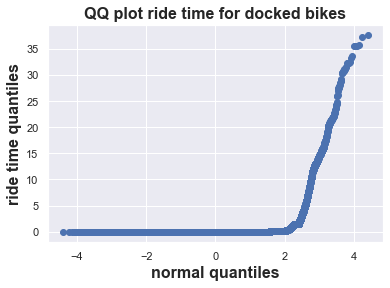

In [126]:
sns.set()
plt.scatter(data_docked["z_theory"],data_docked["z_actual"])
plt.ylabel('ride time quantiles', fontsize=16, fontweight = "bold")
plt.xlabel('normal quantiles', fontsize=16, fontweight = "bold")
plt.title ("QQ plot ride time for docked bikes",fontsize=16,fontweight = "bold")
plt.show()

##### For rides made with docked bikes:
- As seen previously, they are made up of only casual riders;
- The median ride time is 28 minutes;
- There is a large difference between the median (28.05 min) and the mean (122.72 min), since the mean > median, the ride time distribution is highly positively skewed;
- From the quantile-quantile plot we see that the distribution is highly skewed because we do not have a linear relationship between the z- theory and z - actual points.

#### **Ride time with classic bikes**

In [85]:
data_2022_v002.loc[data_2022_v002["rideable_type"]=="classic_bike"].groupby("member_casual").describe().loc[:,["ride_time_min"]]

ride_time_min                                            \
                      count       mean        std       min       25%   
member_casual                                                           
casual             891406.0  28.753074  90.808015  0.016667  8.383333   
member            1709682.0  13.911753  37.864470  0.016667  5.416667   

                                                  
                     50%        75%          max  
member_casual                                     
casual         14.566667  26.833333  1559.933333  
member          9.400000  16.462500  1559.900000

In [108]:
data_classic = data_2022_v002.loc[data_2022_v002["rideable_type"]=="classic_bike"].sort_values(by="ride_time_min",ascending=True).reset_index()

In [109]:
data_classic["count"]=data_classic.index + 1
rows= data_classic.shape[0]
data_classic["percentile"]=data_classic["count"]/rows

In [110]:
data_classic["z_theory"]=ndtri(data_classic["percentile"])
data_classic["z_actual"]=(data_classic["ride_time_min"]-data_classic["ride_time_min"].mean())/data_classic["ride_time_min"].std(ddof=0)

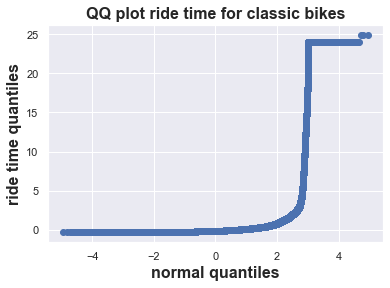

In [125]:
sns.set()
plt.scatter(data_classic["z_theory"],data_classic["z_actual"])
plt.ylabel('ride time quantiles', fontsize=16, fontweight = "bold")
plt.xlabel('normal quantiles', fontsize=16, fontweight = "bold")
plt.title ("QQ plot ride time for classic bikes",fontsize=16,fontweight = "bold")
plt.show()

##### For rides made with classic bikes:
- Casual riders have a higher mean and standard deviation ride time than annual members from the above results, but we can't compare them this way or conclude because the groups have different number of rides (count).
- From the quantile-quantile plot we see that the distribution is highly skewed because we do not have a linear relationship between the z- theory and z - actual points.

#### **Ride time with electric bikes**

In [86]:
data_2022_v002.loc[data_2022_v002["rideable_type"]=="electric_bike"].groupby("member_casual").describe().loc[:,["ride_time_min"]]

ride_time_min                                            \
                      count       mean        std       min       25%   
member_casual                                                           
casual            1252895.0  16.176075  18.075223  0.016667  6.333333   
member            1635735.0  11.463855  13.962098  0.016667  4.816667   

                                                 
                     50%        75%         max  
member_casual                                    
casual         10.933333  19.333333  480.433333  
member          8.300000  14.133333  614.400000

In [116]:
data_electric = data_2022_v002.loc[data_2022_v002["rideable_type"]=="electric_bike"].sort_values(by="ride_time_min",ascending=True).reset_index()

In [117]:
data_electric["count"]=data_electric.index + 1
rows= data_electric.shape[0]
data_electric["percentile"]=data_electric["count"]/rows

In [118]:
data_electric["z_theory"]=ndtri(data_electric["percentile"])
data_electric["z_actual"]=(data_electric["ride_time_min"]-data_electric["ride_time_min"].mean())/data_electric["ride_time_min"].std(ddof=0)

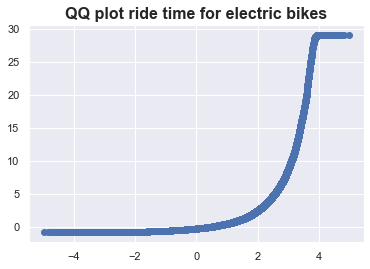

In [124]:
sns.set()
plt.scatter(data_electric["z_theory"],data_electric["z_actual"])
data_classic["z_actual"],
plt.title ("QQ plot ride time for electric bikes",fontsize=16,fontweight = "bold")
plt.show()

##### For rides made with electric bikes:
- Casual riders have a higher mean ride time than annual members from the above results, but we can't compare them this way or conclude because the groups have different number of rides (count);
- Casual riders have a greater standard deviation as compared to that of annual members, it can be backed up by the fact that the sample size of annual members is > casual members. Standard deviation decreases with an increase in the sample size.
- From the quantile-quantile plot we see that the distribution is highly positively skewed because we do not have a linear relationship between the z- theory and z - actual points.

###  **V) Share & Act**
- We will skip the following steps **Share** and **Act** because, the analysis is a personal project.
- We will go directly to findings and recommendations.

### **VI) Findings and Recommendations**

#### 1) How do annual members and casual riders use Cyclistic bikes differently?
- For the year **2022**, which is our study time, we have more rides for annual members (**59%** rides) than casual riders (**41%**).
- When we go down to a finer level, at a month, we observe the following between the casual & annual members:
    * The difference in ride is of an average of **85,304** rides;
    * For the months of **June** and **July** the total number of rides are fairly close as compared to the other months.
- At the week day level of granularity, for the days: Saturday and Sunday, casual riders have greater rides than annual members.
- Docked bikes are only used by casual riders, it represents **3%** of rides (electric 51% and classic 46%).
- **34.3%** of rides by classic bikes are casual riders and **65.7%** are annual members.
- **43.4%** of rides by electric bikes are casual riders and **56.6%** are annual members.
- For rides made with classic and electric bikes, when looking at the cutting values for each of the percentile (25, 50, 75) the ride time for casual riders are higher than that for annual members and also of higher variation.
- Globally, there is a lesser variation (standard deviation) in ride time for electric bikes than the other types, and they account for 51% of the total rides.

#### 2) Why would casual riders buy Cyclistic annual memberships?
- We previously saw that casual riders ride more on weekends, if they have to ride at the same pace during the week, it may motivate them to become annual members.
- If their preference for docked bikes shift to classic or electric bikes, Cyclistic can hope of having an increase in annual members.
- To understand more about the customer's choice of becoming annual members or casual riders and their ride time, the following information can help to do a finer analysis:
    - The reason behind each rides, example: home, work, leisure.. 
    - The cost details for rider type and bike type

#### 3) How can Cyclistic use digital media to influence casual riders to become members?
Through influencer marketing, advertising and environmental awareness campaign on social media and TV, Cyclistic can work on the following: 
- The advantages of using more electric bikes (environmentally friendly) than docked bikes (from our sample data, we do not have annual members for docked bikes only for electric & classic bikes);
- Encourage casual riders to ride throughout the week as they do during the weekend; 
- The advantages in becoming an annual member, example: it can be less costly when we compare the average price (in a year, month, week, day) for each ride as an annual member as compared to a casual rider.